In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [2]:
# Import dataset
df = pd.read_csv('/kaggle/input/flight-delay-case-study/Flight2019.csv')
df.drop(['Unnamed: 21'], axis=1, inplace = True)

In [3]:
# Check headers
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [4]:
# Check info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

# Data exploration
- We will start by getting a feel of the data and check whether some intuitive relations hold. I will use the linregress to calculate linear correlations as this also give me an idea on whether the correlation is significant.

- It seems obvious that there is a correlation between the departure delay and the arrival delay. However, we don't expect a perfect correlation as a pilot can still catch up.

In [7]:
#  Check Linear Regression Model
dflinreg=df
dflinreg.dropna(inplace = True)
linregress(dflinreg['DEP_DEL15'], dflinreg['ARR_DEL15'])

LinregressResult(slope=0.7387852480541546, intercept=0.05759336951361896, rvalue=0.7194299212037122, pvalue=0.0, stderr=0.0009480896010342748, intercept_stderr=0.00039513287723944176)

### A longer flight (higher distance) means that more could go wrong so we would also expect a positive correlation between distance and delay

In [8]:
linregress(dflinreg['DISTANCE'], dflinreg['ARR_DEL15'])

LinregressResult(slope=2.237415418466676e-06, intercept=0.18412145596027452, rvalue=0.0034065404631858785, pvalue=0.01038439166588824, stderr=8.730463522779202e-07, intercept_stderr=0.0008707243280241702)

In [9]:
dftemp=df[['DIVERTED','DEP_DEL15']].copy()
dftemp.dropna(inplace=True)
linregress(dftemp['DIVERTED'], dftemp['DEP_DEL15'])

/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)


LinregressResult(slope=nan, intercept=nan, rvalue=0.0, pvalue=1.0, stderr=inf, intercept_stderr=nan)

In [10]:
dftemp[['DIVERTED','DEP_DEL15']].groupby(['DIVERTED']).mean()

,DEP_DEL15
DIVERTED,
0.0,0.173695


Probably some airports are better at time management than other airports. Let's see whether this is the case. We start by calculating the average of the binary delay indicator for each airport:

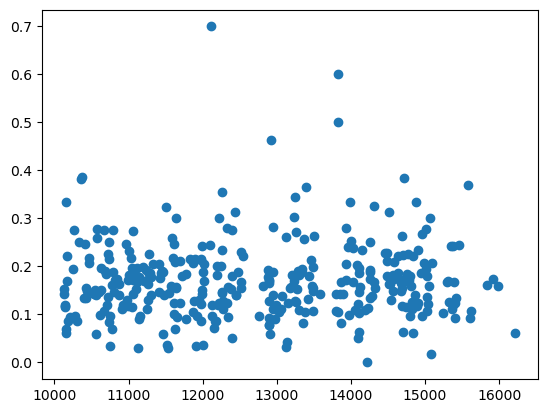

In [11]:
delayPerAirport=df[['DEP_DEL15','ORIGIN_AIRPORT_ID']].groupby(['ORIGIN_AIRPORT_ID']).mean()
delayPerAirport.reset_index(inplace=True)
plt.scatter(delayPerAirport['ORIGIN_AIRPORT_ID'],delayPerAirport['DEP_DEL15'])

There seems to be a wide variety in between airports. However, most airports stay withing the 0 - 0.3 range. In the next step, the avarage delay on arrival is compared to the arrival airport:

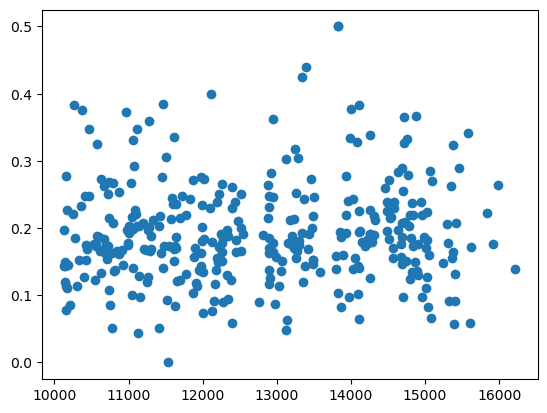

In [12]:
delayPerAirport=df[['ARR_DEL15','DEST_AIRPORT_ID']].groupby(['DEST_AIRPORT_ID']).mean()
delayPerAirport.reset_index(inplace=True)
plt.scatter(delayPerAirport['DEST_AIRPORT_ID'],delayPerAirport['ARR_DEL15'])

Again, the numbers vary quite a lot although most of the avarages are in the 0 - 0.3 array.

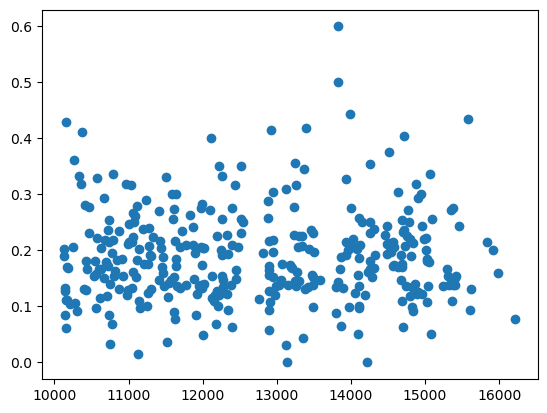

In [13]:
delayPerAirport=df[['ARR_DEL15','ORIGIN_AIRPORT_ID']].groupby(['ORIGIN_AIRPORT_ID']).mean()
delayPerAirport.reset_index(inplace=True)
plt.scatter(delayPerAirport['ORIGIN_AIRPORT_ID'],delayPerAirport['ARR_DEL15'])

Another relationship that sounds intuitive but needs verification is whether it is actually true that the number of departure and arrival delays increase during the day and decrease during the night. We start by comparing the historical probability that a flight was in delay per departure block.`

In [14]:
delayDepPerTimeSlot= df[['DEP_TIME_BLK', 'DEP_DEL15']].groupby(['DEP_TIME_BLK']).mean()
delayDepPerTimeSlot

,DEP_DEL15
DEP_TIME_BLK,
0001-0559,0.084570
0600-0659,0.069554
0700-0759,0.090316
0800-0859,0.107056
0900-0959,0.130509
1000-1059,0.157811
1100-1159,0.167258
1200-1259,0.181207
1300-1359,0.196924


We can do the same for the relation between the arrival block and the probability of arrival delay. However, No arrival block variable exists so we first had to create such a variable.

In [15]:
#Function to transfer the arrival time to an arrival time block
def timeToBlock(t):
    block="Nan"
    if(t> 0 and t< 600): block="0001-0559"
    if(t>559 and t< 700): block= "0600-0659"
    if(t>659 and t< 800): block= "0700-0759"
    if(t>759 and t< 900): block= "0800-0859"
    if(t>859 and t< 1000): block= "0900-0959"
    if(t>959 and t< 1100): block= "1000-1059"
    if(t>1059 and t< 1200): block= "1100-1159"
    if(t>1159 and t< 1300): block= "1200-1259"
    if(t>1259 and t< 1400): block= "1300-1359"
    if(t>1359 and t< 1500): block= "1400-1459"
    if(t>1459 and t< 1600): block= "1500-1559"
    if(t>1559 and t< 1700): block= "1600-1659"
    if(t>1659 and t< 1800): block="1700-1759"
    if(t>1759 and t< 1900): block= "1800-1859"
    if(t>1859 and t< 2000): block= "1900-1959"
    if(t>1959 and t< 2100): block= "2000-2059"
    if(t>2059 and t< 2200): block= "2100-2159"
    if(t>2159 and t< 2300): block= "2200-2259"
    if(t>2259 and t< 2400): block="2300-2359"
    return block

In [16]:
df['ARR_TIME_BLK']=df['ARR_TIME'].apply(timeToBlock)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,ARR_TIME_BLK
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0700-0759
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,1600-1659
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,1300-1359
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,1600-1659
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,1900-1959


In [17]:
delayArrPerTimeSlot= df[['ARR_TIME_BLK', 'ARR_DEL15']].groupby(['ARR_TIME_BLK']).mean()
delayArrPerTimeSlot

,ARR_DEL15
ARR_TIME_BLK,
0001-0559,0.466159
0600-0659,0.064741
0700-0759,0.056754
0800-0859,0.078176
0900-0959,0.105764
1000-1059,0.126109
1100-1159,0.141322
1200-1259,0.153668
1300-1359,0.153937


Delay prediction
Create a dataframe of possible predictors I will remove a list of variables:

Variables to be predicted; ARR_DEL15 and CANCELLED
OP_UNIQUE_CARRIER --> Same as OP_CARRIER_AIRLINE_ID
OP_CARRIER --> also used for carrier identification but not unique so less usefull as OP_CARRIER_AIRLINE_ID
TAIL_NUM, OP_CARRIER_FL_NUM --> Doesn't make sense to use the flight number as a predictor
DEP_Time_BLK --> use DEP_TIME
DEST --> Seems to consist of same information as other included variables
DEST_AIRPORT_SEQ_ID and ORIGIN_AIRPORT_SEQ_ID --> use constant airport ids for the moment. Could be interesting if there would be trends in airport performance

In [19]:
from sklearn.model_selection import train_test_split

X=df.drop(['ARR_DEL15','CANCELLED', 'OP_UNIQUE_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM'
           ,'DEST_AIRPORT_SEQ_ID','ARR_TIME_BLK', 'ORIGIN', 'OP_CARRIER', 'DEP_TIME_BLK',
          'DEST','ORIGIN_AIRPORT_SEQ_ID'], axis=1)
df.dropna(inplace=True)
#X=  X.select_dtypes(exclude=['object'])
y=df['ARR_DEL15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,DIVERTED,DISTANCE
0,1,2,20363,11953,10397,601.0,0.0,722.0,0.0,300.0
1,1,2,20363,13487,11193,1359.0,0.0,1633.0,0.0,596.0
2,1,2,20363,11433,11193,1215.0,0.0,1329.0,0.0,229.0
3,1,2,20363,15249,10397,1521.0,0.0,1625.0,0.0,223.0
4,1,2,20363,10397,11778,1847.0,0.0,1940.0,0.0,579.0


In [20]:
df.isnull().any()

DAY_OF_MONTH             False
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                 False
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          False
DEST_AIRPORT_SEQ_ID      False
DEST                     False
DEP_TIME                 False
DEP_DEL15                False
DEP_TIME_BLK             False
ARR_TIME                 False
ARR_DEL15                False
CANCELLED                False
DIVERTED                 False
DISTANCE                 False
ARR_TIME_BLK             False
dtype: bool

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
clf.score(X_test, y_test)

0.9157564465004712